#

In [2]:
# -*- coding: UTF-8 -*-
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
#from wordcloud import WordCloud
#from ggplot import *
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10)
saved_style_state = matplotlib.rcParams.copy()

In [11]:
#movies = pd.read_csv("c:/users/daniel/downloads/moviedata.csv", encoding='UTF-8')
movies = pd.read_csv("c:/users/daniel/documents/Movie Data.csv")
print(movies.shape)
movies = movies.drop_duplicates(subset='movie_title')
print(movies.shape)

(5043, 28)
(4917, 28)


In [ ]:
strings = []
for colname, colvalue in movies.iteritems():
    if type(colvalue[1]) == str:
        strings.append(colname)
num_list = movies.columns.difference(strings)

In [ ]:
num_movies = movies[num_list]

In [ ]:
num_movies = num_movies.fillna(value=0, axis =1)

In [ ]:
movies.columns

In [ ]:
num_movies.columns

In [ ]:
#Example Movie

row_one = movies.iloc[0]
row_one

In [ ]:
# Begin non-value graphs

In [ ]:
movies["color"].value_counts()

In [ ]:
colours = ['orange', 'gray']
movies["color"].value_counts().plot(kind="bar", color=colours)

In [ ]:
dname = movies["director_name"].value_counts()
print dname

In [ ]:
dname[dname > 10].plot(kind="bar")

In [ ]:
a1 = movies["actor_1_name"].value_counts()
print a1

In [ ]:
a1[a1 > 10].plot(kind="bar")

In [ ]:
a2 = movies["actor_2_name"].value_counts()
print a2

In [ ]:
a2[a2 > 7].plot(kind="bar")

In [ ]:
a3 = movies["actor_3_name"].value_counts()
print a3

In [ ]:
a3[a3 > 5].plot(kind="bar")

In [ ]:
genres = movies["genres"].value_counts()
print genres

In [ ]:
gen = movies["genres"].notnull()
movies["genres"][gen].apply(lambda x :x.split("|"))
movies["single_genres"] = movies["genres"][gen].apply(lambda x :x.split("|"))

splitg = movies["single_genres"].apply(lambda x : pd.Series(x).value_counts()).sum().sort_values(ascending = False)
print splitg

In [ ]:
genres[genres > 30].plot(kind="bar")

In [ ]:
splitg.plot(kind="bar")

In [ ]:
keyword = movies["plot_keywords"].notnull()
movies["plot_keywords"][keyword].apply(lambda x :x.split("|"))
movies["good_keywords"] = movies["plot_keywords"][keyword].apply(lambda x :x.split("|"))
gwords = movies["good_keywords"].apply(lambda x : pd.Series(x).value_counts()).sum().sort_values(ascending = False)
print gwords

In [ ]:
#tags = movies['plot_keywords'][keyword].copy().str.split('|').apply(pd.Series, 1).stack()
#tags.index = tags.index.droplevel(-1)
#tags.index
#tags.name = 'tags'
#movies_w_tags = movies.join(tags)



In [ ]:
#print movies["good_keywords"]
#phraseList = gwords

#def wordCount(phraseList, unwatedWords):
#    wordList = []
#    differentWords = []
#    wordCountList = []
#    unwantedWords = ["and", "an", "is", "the"]
    
#    for phrase in phraseList:
#        for word in phrase.split(" "):
#            wordList.append(word)
            
#    for word in wordList():
#        if word not in differentWords and word not in unwantedWords:
#                differentWords.append(word)
#                wordCountList.append(wordList.count(word))
                
#    print zip(wordCountList, differentWords)


In [ ]:
gwords[gwords > 60].plot(kind="bar")

In [ ]:
lang = movies["language"].value_counts()
print lang

In [ ]:
sum_lang = sum(lang)
print sum_lang
minus = sum_lang - lang.head(1)
print minus
labels = ['English', 'Not English']  
explode = (0.1, 0.01)

f, ax1 = plt.subplots()
ax1.pie((lang.head(1), minus), explode=explode, labels=labels, autopct='%1.0f%%', shadow=True)
ax1.axis('equal')
plt.show()

In [ ]:
rating = movies["content_rating"].value_counts()
print rating

In [ ]:
rating.plot(kind="bar")

In [ ]:
year = movies["title_year"].value_counts()
print year

In [ ]:
year.plot(kind="bar")

In [ ]:
ratio = movies["aspect_ratio"].value_counts()
print ratio

In [ ]:
ratio[ratio > 10].plot(kind="bar")

In [ ]:
#Begin Quantity Graphs

In [ ]:
num_movies["num_critic_for_reviews"].hist(bins=50)

In [ ]:
num_movies["num_user_for_reviews"].hist(bins=20)

In [ ]:
num_movies["num_voted_users"].hist(bins=20)

In [ ]:
num_movies["duration"].hist(bins=50)
plt.axvline(num_movies["duration"].mean(), color='k', linestyle='dashed', linewidth=3)

In [ ]:
pos_dir_fb_likes = num_movies["director_facebook_likes"]
pos_dir_fb_likes[pos_dir_fb_likes > 0].drop_duplicates().hist(bins=100)

In [ ]:
pos_fb_likes = num_movies["movie_facebook_likes"]
pos_fb_likes[pos_fb_likes > 0].hist(bins=50)

In [ ]:
pos_1_fb_likes = num_movies["actor_1_facebook_likes"]
pos_1_fb_likes[pos_1_fb_likes > 0].drop_duplicates().hist(bins=50)

In [ ]:
pos_2_fb_likes = num_movies["actor_2_facebook_likes"]
pos_2_fb_likes[pos_2_fb_likes > 0].drop_duplicates().hist(bins=50)

In [ ]:
pos_3_fb_likes = num_movies["actor_3_facebook_likes"]
pos_3_fb_likes[pos_3_fb_likes > 0].drop_duplicates().hist(bins=50)

In [ ]:
pos_cast_fb_likes = num_movies["cast_total_facebook_likes"]
pos_cast_fb_likes[pos_cast_fb_likes > 0].drop_duplicates().hist(bins=50)

In [ ]:
num_movies["facenumber_in_poster"].hist(bins=44)
num_movies["facenumber_in_poster"].value_counts()

In [ ]:
#Finding out what a specific outlier is

movie_faces = zip(range(len(num_movies["facenumber_in_poster"])),num_movies["facenumber_in_poster"])

for movie in movie_faces:
    if movie[1] == 43:
        print movies["movie_title"][movie[0]]
        

        

In [ ]:
pos_gross = num_movies["gross"]
pos_gross[pos_gross > 0].hist(bins=100)
plt.xlabel('x100 million', fontsize=18)
plt.axvline(num_movies["gross"].mean(), color='k', linestyle='dashed', linewidth=3)

In [ ]:
pos_budget = num_movies["budget"]
pos_budget[pos_budget > 0].hist(bins=100, range=[0,310000000])
plt.xlabel('x100 million', fontsize=18)
plt.axvline(num_movies["budget"].mean(), color='k', linestyle='dashed', linewidth=3)

In [ ]:
pos_gross[pos_gross > 0].hist(bins=30, alpha=1, range=[0,300000000], color='k')
pos_budget[pos_budget > 0].hist(bins=30, range=[0,300000000], alpha=0.5, color='r')
plt.xlabel('x100 million', fontsize=18)

In [ ]:
num_movies["imdb_score"].hist(bins=80)
plt.axvline(num_movies["imdb_score"].mean(), color='k', linestyle='dashed', linewidth=3)

In [ ]:
top_movies = movies[["movie_title","imdb_score"]].sort_values("imdb_score", ascending = False).head(10)
worst_movies = movies[["movie_title","imdb_score"]].sort_values("imdb_score", ascending = True).head(10)
worst_movies = worst_movies.sort_values("imdb_score", ascending = False)
combo_movies = [top_movies, worst_movies]
combo = pd.concat(combo_movies)
combo.head(20)

In [ ]:
# End Basic Graphs


# Story Number 1
# Top Keywords
#Now to look at the top end movies of certain categories and then the prevailant themes.

In [ ]:
source_count = 150
not_wanted = ["to", "and", "the", "boy", "in", "of", "girl", "based on", "based", "on", "box office"]
wc = 60

In [ ]:
top500imdb = movies[["movie_title","imdb_score", "good_keywords"]].sort_values("imdb_score", ascending = False).head(source_count)
imdb_keywords = top500imdb["good_keywords"].apply(lambda x : pd.Series(x).value_counts()).sum().sort_values(ascending = False)


In [ ]:
listy = top500imdb["good_keywords"].values.T.tolist()
#print listy
#''.join([str(r) for v in listy for r in v]) 
flat_listy = []
for x in listy:
    try:
        for y in x:
            flat_listy.append(y)
    except: "Filler"
flater_listy = " ".join(flat_listy)

In [ ]:
wordcloudimdb = WordCloud(width = 2000, height = 2000, stopwords=not_wanted, background_color='white', max_words = wc).generate(flater_listy)
plt.imshow(wordcloudimdb)
plt.axis("off")
plt.show()


In [ ]:
culled_movies = movies.fillna(value=0, axis =1)

top500gross = movies[["movie_title","gross", "good_keywords"]].sort_values("gross", ascending = False).head(source_count)
gross_keywords = top500gross["good_keywords"].apply(lambda x : pd.Series(x).value_counts()).sum().sort_values(ascending = False)


In [ ]:
lister = top500gross["good_keywords"].values.T.tolist()
flat_lister = []
for x in lister:
    try:
        for y in x:
            flat_lister.append(y)
    except: "Filler"
flater_lister = " ".join(flat_lister)

In [ ]:
wordcloudgross = WordCloud(width = 2000, height = 2000, stopwords=not_wanted, background_color='white', max_words = wc).generate(flater_lister)
plt.imshow(wordcloudgross)
plt.axis("off")
plt.show()

In [ ]:
top500budget = movies[["movie_title","budget", "good_keywords"]].sort_values("budget", ascending = False).head(source_count)
budget_keywords = top500budget["good_keywords"].apply(lambda x : pd.Series(x).value_counts()).sum().sort_values(ascending = False)

In [ ]:
listest = top500budget["good_keywords"].values.T.tolist()
flat_listest = []
for x in listest:
    try:
        for y in x:
            flat_listest.append(y)
    except: "Filler"
flater_listest = " ".join(flat_listest)

In [ ]:
wordcloudbudget = WordCloud(width = 2000, height = 2000, stopwords=not_wanted, background_color='white', max_words = wc).generate(flater_listest)
plt.imshow(wordcloudbudget)
plt.axis("off")
plt.show()

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(14, 5))
ax1.imshow(wordcloudimdb, aspect='auto')
ax1.set_title('IMDB_Score', size='20')
ax1.axis("off")
ax2.imshow(wordcloudgross, aspect='auto')
ax2.set_title('Gross', size='20')
ax2.axis("off")
ax3.imshow(wordcloudbudget, aspect='auto')
ax3.set_title('Budget', size='20')
ax3.axis("off")
plt.tight_layout()

In [ ]:
# Story number 3
# Most profitable films

In [ ]:
movies["profit"] = (movies["gross"] - movies["budget"])
movies["ROI"] = ((movies["profit"]/movies["budget"])*100)

In [ ]:
#profit_list = movies[["movie_title", "profit"]].sort_values("profit", ascending = False).head(15)
#print profit_list
profit_list = movies.sort_values("profit", ascending = False).head(15)
plist = profit_list['movie_title']
theme_xkcd()

In [ ]:
profit_gg = ggplot(aes(x='budget', y='profit', label='movie_title'), data=profit_list)
profit_gg + geom_text(angle = 45, size = 'small', color='black') + theme_bw() + geom_point(color='black', size = 200) + geom_point(color='pink', size = 100) + xlab("Budget x100 Million") + ylab("Profit x100 Million") + ggtitle("Highest Profit Movies plotted against their Budget") 


In [ ]:
roi_head = movies[["movie_title", "ROI"]].sort_values("ROI", ascending = False).head(30)
roi_list = movies.sort_values("ROI", ascending = False).head(15)

In [ ]:
roi_gg = ggplot(aes(x='budget', y='profit', label='movie_title'), data=roi_list)
roi_gg + geom_text(size = 'smaller', color='black') + theme_bw() + geom_point(color='black', size = 200) + geom_point(color='pink', size = 100) + xlab("Budget") + ylab("Profit x100 Million") + ggtitle("Highest 'Return on Investment' plotted against their Budget") 



In [ ]:
# Story 3

In [ ]:
actor_col = movies[["actor_1_name","imdb_score"]].sort_values("imdb_score", ascending = False).head()
print actor_col

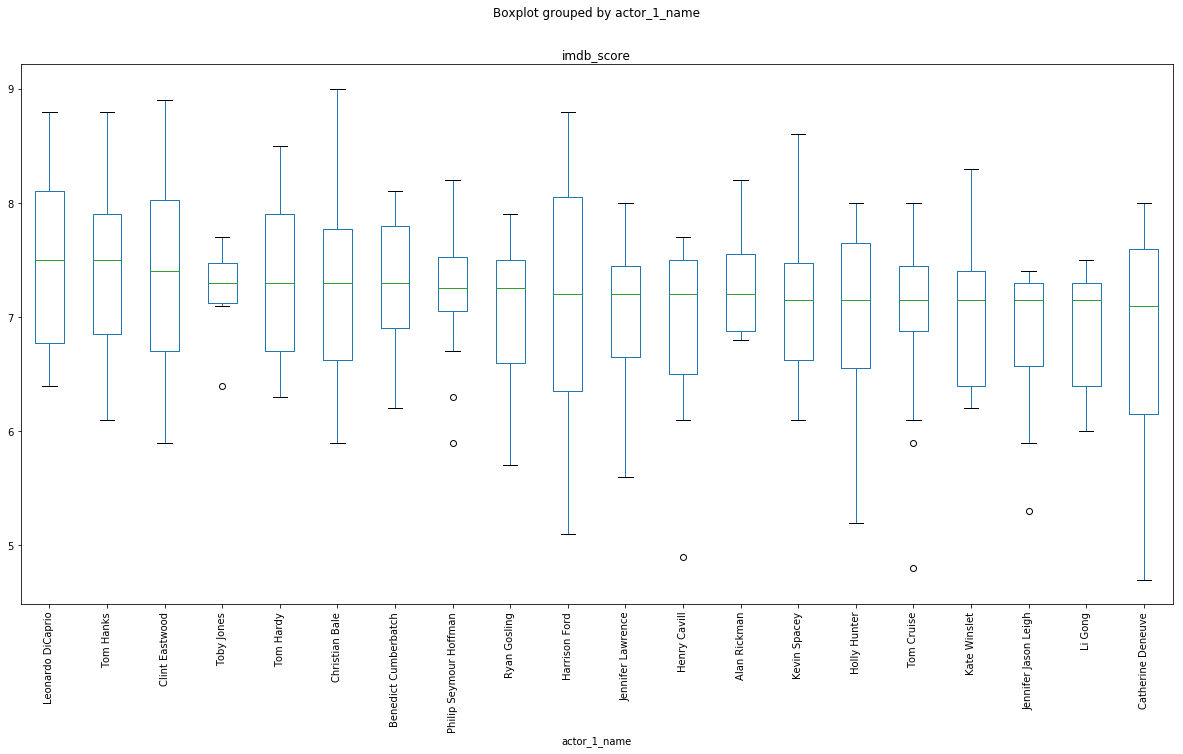

In [39]:
movies['sort_act'] = movies.groupby('actor_1_name', sort=False)['imdb_score'].rank(ascending=False)
actorMean = movies.groupby('actor_1_name', sort=True).agg(['median','count'])['imdb_score']
actorMean=actorMean.loc[actorMean['count']>5]
actorMean=actorMean.sort_values('median', ascending=False).head(20)
actorMean['rank']=range(1,actorMean['median'].size+1)
actorMean=actorMean.sort_index()

moviesTopActors=movies[['actor_1_name', 'imdb_score']].loc[movies['actor_1_name'].isin(actorMean.index.values)].sort_values(['actor_1_name', 'imdb_score'], ascending=False)
moviesTopActors.boxplot(column='imdb_score',by='actor_1_name',rot=90, grid=False, positions=actorMean['rank'])
